# Semana 11 - Classificação

Anteriormente, examinamos brevemente o problema de tentar prever quais usuários da *Facedata* pagam para ter contas *premium*. Vamos revisitar esse problema, entender rapidamente o conceito de probabilidade e decidir quando aplicar a regressão logística.

##Introdução

Temos um conjunto de dados anônimo de 200 usuários, contendo seus anos de experiência como cientista de dados e se paga por uma conta *premium*. Como é típico com variáveis categóricas, representaremos o *output* como 0 (conta gratuita) ou 1 (conta paga). Vamos preparar nossos dados:

In [ ]:
# Carregando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Dados
experiencia = [6.8, 3.9, 0.1, 3.4, 4.3, 1.4, 6.2, 5.9, 5.1,
               6.5, 2.1, 5.4, 7.4, 0.7, 7.3, 7.9, 6.5, 3.7,
               3.7, 3.4, 4.4, 7.9, 3.3, 5.4, 3.5, 7.0, 7.4,
               4.2, 3.8, 2.0, 2.8, 2.0, 4.4, 7.0, 4.0, 4.4,
               2.5, 7.0, 3.9, 5.1, 4.2, 0.6, 2.4, 3.2, 1.4,
               0.2, 4.5, 1.8, 2.2, 7.8, 6.5, 7.0, 7.0, 7.5,
               1.1, 1.3, 4.0, 4.8, 2.3, 3.4, 2.9, 1.3, 2.2,
               2.8, 4.8, 3.3, 4.5, 2.1, 3.1, 1.7, 7.3, 2.3,
               4.8, 6.4, 6.0, 5.1, 3.4, 1.0, 0.1, 4.3, 5.9,
               2.6, 1.5, 5.8, 2.9, 2.4, 4.2, 4.8, 7.6, 3.9,
               2.4, 5.3, 4.0, 7.3, 3.5, 4.3, 0.1, 2.9, 7.8,
               2.2, 7.0, 2.8, 3.7, 6.1, 4.6, 6.7, 7.1, 5.1,
               4.4, 4.9, 6.0, 5.6, 4.9, 5.0, 0.7, 2.0, 2.4,
               6.1, 6.3, 1.6, 8.3, 0.2, 4.8, 6.5, 4.4, 7.7,
               6.6, 1.9, 1.7, 3.4, 7.5, 3.1, 3.5, 4.6, 1.9,
               7.5, 1.6, 6.0, 0.9, 8.0, 6.4, 9.7,  5.9,  7.5,
               9.7,  6.7,  6.9, 11.3,  9.4,  7.9,  8.7,  6.7,
               7.6, 10.5,  6.8,  6.4,  7.6,  6.8,  6.8,  5.8,
               6.5,  6.4,  6.1,  7.9,  6.1,  9.9,  9.0, 10.9,
               7.9,  8.4, 11.3, 11.4,  6.8,  7.2, 10.1,  9.3,
               7.7,  6.9, 10.7,  7.2,  9.8,  7.7,  9.6,  6.5,
               10.3,  10.6,  9.7, 10.4,  10.8, 10.8,  8.9, 10.9,
               10.0,  8.2, 7.5, 11.2, 10.6,  10.3, 11.5,  8.9]

tipo_conta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# Transformando para pd.DataFrame
conta = pd.DataFrame({
    "experiencia": experiencia,
    "tipo_conta": tipo_conta
})

conta

,experiencia,tipo_conta
0,6.8,0
1,3.9,0
2,0.1,0
3,3.4,0
4,4.3,0
...,...,...
195,11.2,1
196,10.6,1
197,10.3,1
198,11.5,1


Uma primeira tentativa óbvia é usar a regressão linear e encontrar o melhor modelo:
$$ \text{conta paga} = \alpha + \beta \times \text{experiência} + \varepsilon $$

Embora nosso *output* seja um atributo **quantitativo discreto**, não há nada que nos impeça de modelar o problema dessa maneira em *Python*.

> Por essas e outras situações, a teoria é tão importante quanto a prática. O que irá diferenciar o trabalho de um cientista de dados é a tomada de decisão melhor do que de uma inteligência artificial.

Vamos aplicar uma regressão linear nestes dados utilizando:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(conta['experiencia'])
y_treino = conta['tipo_conta']

# Definindo o modelo de regressao linear
reg = LinearRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino,
                          y = y_treino)

> Neste exemplo, não nos atentamos a separar a base de dados em `treinamento` e `teste`. Mas é sempre recomendável.

Note que, enquanto nosso *output* é um valor `0` ou `1`, as previsões feitas pelo modelo linear retornam:

In [ ]:
# Previsao
previsao = modelo_estimado.predict(X = X_treino)
print(previsao)

[ 0.4411151   0.11658394 -0.30866379  0.06063029  0.16134686 -0.16318431
  0.37397072  0.34039853  0.2508727   0.40754291 -0.0848492   0.28444489
  0.50825948 -0.24151941  0.49706875  0.56421313  0.40754291  0.09420248
  0.09420248  0.06063029  0.17253759  0.56421313  0.04943956  0.28444489
  0.07182102  0.46349656  0.50825948  0.15015613  0.10539321 -0.09603993
 -0.00651409 -0.09603993  0.17253759  0.46349656  0.12777467  0.17253759
 -0.04008628  0.46349656  0.11658394  0.2508727   0.15015613 -0.25271014
 -0.05127701  0.03824883 -0.16318431 -0.29747306  0.18372832 -0.11842139
 -0.07365847  0.5530224   0.40754291  0.46349656  0.46349656  0.51945021
 -0.19675649 -0.17437503  0.12777467  0.21730051 -0.06246774  0.06063029
  0.00467664 -0.17437503 -0.07365847 -0.00651409  0.21730051  0.04943956
  0.18372832 -0.0848492   0.0270581  -0.12961212  0.49706875 -0.06246774
  0.21730051  0.39635218  0.35158926  0.2508727   0.06063029 -0.20794722
 -0.30866379  0.16134686  0.34039853 -0.02889555 -0

De forma geral, vamos analisar o resultado para todo o intervalo utilizando um gráfico:

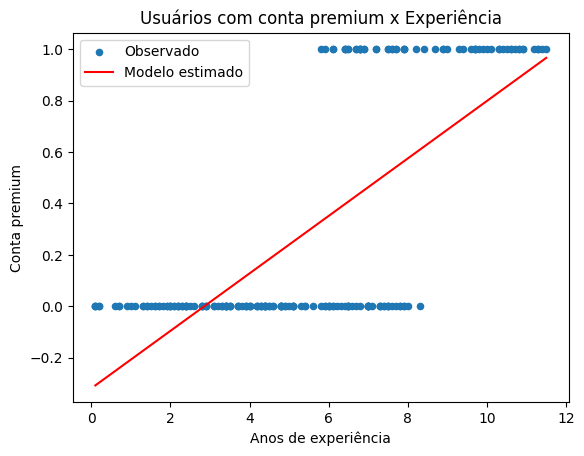

In [ ]:
# Grafico de dispersao - conjunto de teste
conta.plot.scatter(x="experiencia", y= "tipo_conta", label='Observado')

# Desenhando a linha de previsao
x_prev = np.linspace(conta['experiencia'].min(),
                     conta['experiencia'].max(),
                     100).reshape(-1, 1)
y_prev = modelo_estimado.intercept_ + modelo_estimado.coef_[1] * x_prev
plt.plot(x_prev, y_prev, color='red', label='Modelo estimado')

# Rotulos e titulo
plt.xlabel("Anos de experiência")
plt.ylabel("Conta premium")
plt.title('Usuários com conta premium x Experiência')

# Legenda
plt.legend()

# Exibindo o grafico
plt.show()

Assim, essa abordagem leva à alguns problemas imediatos:
*   Gostaríamos que nossas previsões fossem 0 ou 1, para indicar a associação da classe. Tudo bem se eles estiverem entre 0 e 1, pois podemos interpretá-los como probabilidades - uma saída de 0,25 pode representar 25\% de chance de ser um membro pago. Mas as saídas do modelo linear podem ser grandes números positivos ou até números negativos, que não está claro como interpretar nesse contexto.

Gostaríamos que valores menores de `experiencia` correspondessem à probabilidades próximas de `0`. Por outro lado, valores maiores correspondessem à probabilidades próximas de `1`. Podemos fazer isso aplicando outra função ao resultado.


##Função Logística

A regressão logística possui esse nome por conta da função matemática homônima que ela relaciona conforme a figura a seguir:

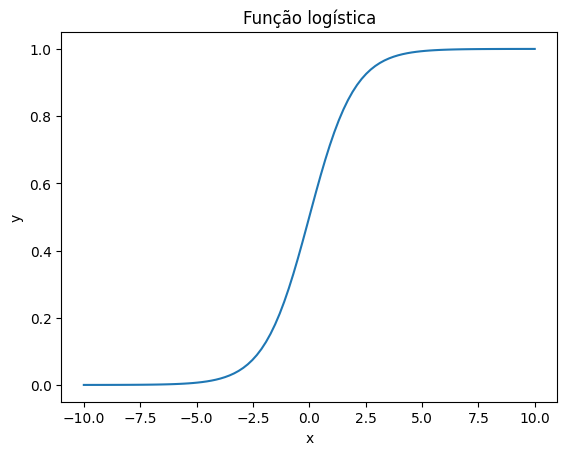

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funcao logistica
def logistica(x):
    return 1 / (1 + np.exp(-x))

# Gera 100 valores de -10 a 10
x = np.linspace(-10, 10, 100)

# Calcula o valor da funcao logistica para cada x
y = logistica(x)

# Desenha o grafico
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função logística')
plt.show()

Graficamente, a curva se aproxima de 1 quando `x` (ou o *input*) cresce. Por outro lado, se aproxima de 0 quando `x` (ou o *input*) diminui. Assim, a curva simboliza a probabilidade de um evento ou resultado.

> A probabilidade é um conceito fundamental na teoria estatística. Ela é uma medida numérica que descreve a chance de um evento ocorrer. A probabilidade varia entre 0 e 1, sendo que 0 indica a impossibilidade do evento ocorrer e 1 indica a certeza absoluta de que o evento ocorrerá.

##Aplicação

De forma similar a feita anteriormente, vamos dividir nossos dados em um conjunto de treinamento e um conjunto de teste:

In [ ]:
from sklearn.model_selection import train_test_split

# Definindo conjunto de treino e teste simultaneamente
# Aqui, o conjunto de treino sera 80% dos dados
treino, teste = train_test_split(conta,
                                 train_size = 0.80,
                                 random_state = 123)
# random_state = 123 foi escolhido aleatoriamente
# use o numero que achar melhor

print(treino.shape)
print(teste.shape)

(160, 2)
(40, 2)


Utilizaremos 80% dos dados como base de treino. De forma muito similar à regressão linear, aplicamos o modelo logístico da seguinte forma:

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(treino['experiencia'])
y_treino = treino['tipo_conta']

# Definindo o modelo de regressao logistica
reg = LogisticRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino,
                          y = y_treino)

Por fim, podemos fazer previsões da seguinte forma:

In [ ]:
# Definindo input e output - teste
X_teste = sm.add_constant(teste['experiencia'])
y_teste = teste['tipo_conta']

# Previsao
previsao = modelo_estimado.predict(X = X_teste)
print(previsao)

[0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 0 0]


##Interpretação

Infelizmente, este modelo não é tão intuitivo de interpretar quanto a regressão linear. A interpretação geral dos coeficientes $\alpha$ e $\beta$ são diferentes e não serão abordadas neste contexto. De forma geral, a curva logística irá representa a probabilidade de um usuário ter uma conta *premium* dada sua experiência, como mostra a figura abaixo:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


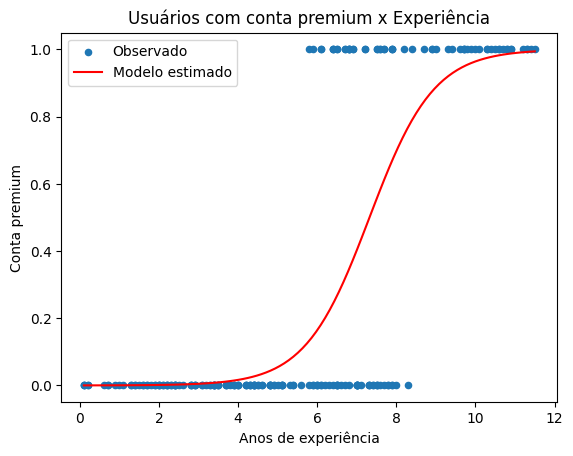

In [ ]:
# Grafico de dispersao - conjunto de teste
conta.plot.scatter(x="experiencia", y= "tipo_conta", label='Observado')

# Desenhando a linha de previsao
x_prev = np.linspace(conta['experiencia'].min(),
                     conta['experiencia'].max(),
                     100).reshape(-1, 1)
y_prev = modelo_estimado.predict_proba(X = sm.add_constant(x_prev))[:, 1]

plt.plot(x_prev, y_prev, color='red', label='Modelo estimado')

# Rotulos e titulo
# Rotulos e titulo
plt.xlabel("Anos de experiência")
plt.ylabel("Conta premium")
plt.title('Usuários com conta premium x Experiência')

# Legenda
plt.legend()

# Exibindo o grafico
plt.show()

##Performance

Anteriormente, introduzimos métricas de *performance* falando sobre `Matriz de confusão`. Neste caso da regressão logística, que faz a classificação de usuários, criamos essa matriz da seguinte forma:

In [ ]:
from sklearn.metrics import confusion_matrix

# Matriz de confusao
mat_confusao = confusion_matrix(y_teste, previsao)
mat_confusao

array([[20,  4],
       [ 6, 10]])

Vimos também que um `bom' modelo envolve um equilíbrio entre as métricas \textit{precisão} e \textit{sensibilidade}. Podemos calculá-las diretamente:

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Precisao
print(precision_score(y_teste, previsao))

# Sensibilidade
print(recall_score(y_teste, previsao))

0.7142857142857143
0.625


Ou seja, temos uma precisão de `0,714`, prevemos corretamente 71% das vezes que o usuário tem uma conta paga. Por outro lado, temos uma sensibilidade de `0,625`, dado os usuários com contas pagas, acertamos 62,5%.

> Lógico que temos vários outros fatores envolvidos, mas conseguimos construir um bom modelo para classificar um usuário no grupo de contas pagas ou gratuitas.